# 0.0. IMPORTS


In [1]:
import pandas as pd
import inflection
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import precision_score, recall_score, f1_score
from sklearn.tree            import DecisionTreeClassifier

## 0.1.0 Helper Functions



In [2]:
# função pra avaliar o modelo
def evaluate_models(models, X_test, y_test):
    # Criação do DataFrame vazio
    df = pd.DataFrame(columns=['Modelo', 'Precision', 'Recall', 'F1-score'])

    # Loop sobre os modelos
    for model in models:
        # Previsões
        y_pred = model.predict(X_test)

        # Cálculo das métricas
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        acuracia = accuracy_score( y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Adição dos resultados ao DataFrame
        df = df.append({'Modelo': model, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'acuracia' : acuracia },
                       ignore_index=True)

    return df

## 0.2.0. Loading Data

In [3]:
df_raw = pd.read_csv( 'https://raw.githubusercontent.com/OscarFantozzi/data_hk/main/train.csv' )
df_test = pd.read_csv( 'https://raw.githubusercontent.com/OscarFantozzi/data_hk/main/test.csv' )

# 1.0. PASSO 01 - DESCRIÇÃO DOS DADOS

In [4]:
df1 = df_raw.copy()

## 1.0. Explicação das colunas

- id: Código do cliente
- gender: Genero msculino ou feminino
- customer type: Tipo de cliente, fidelidade.
- age: Idade cliente
- type of purchase: Tipo de compra
- store size: Tamanho da loja
- store distance: Distância da loja em relação ao centro
- in_store wifi: Satisfação do Wifi da loja
- open/close time convenient: Horário de abertura e fechamento da loja.
- easy of online shopping: Facilidade de compras on line
- store location: Localização da loja
- toilet cleaning:Limpeza do banheiro
- dressing room:Provador
- waiting room:Sala de espera
- kids entertainment:Entretenimento infantil
- seller service:Serviço do vendedor
- showroom: Exposição dos produtos
- self_store: Loja propria
- purchase service: Serviço de compra
- store service: Serviço da loja
- cleanliness: limpeza da loja
- carrier delay in minutes: Atraso da operadora em minutos
- delivery delay in minutes: Demora na entrega em minutos
- satisfaction: Stisfação do cliente.

## 1.1. Rename Columns

In [5]:
## crio uma lista com o nome das colunas antigos
cols_old = [ 'id','Gender','Customer Type','Age','Type of Purchase','Store size',
            'Store distance','InStore wifi', 'Open/Close time convenient',
            'Easy of online shopping','Store location','Toilet cleaning',
            'Dressing room','Waiting room','Kids entertainment','Seller service',
            'Showroom','Self-Store', 'Purchase service','Store Service',
            'Cleanliness','Carrier delay in minutes','Delivery delay in minutes',
             'satisfaction']

# coloco as colunas no estilo snake_case
snake_case = lambda x : inflection.underscore(x) # defino a lambda function

# aplico o map para cada nome cols_old e crio a lista cols_new
cols_new = list( map( snake_case, cols_old ) )

# renomeio as coluanas do dataset
df1.columns = cols_new

In [6]:
#Normatizando o nome das colunas
df1.columns = [ 'id','gender','customer_Type','age','type_of_purchase','store_size',
                'store_distance','inStore_wifi', 'open_close_time_convenient',
                'easy_of_online_shopping','store_location','toilet_cleaning',
                'dressing_room','waiting_room','kids_entertainment','seller_service',
                'showroom','self_Store', 'purchase_service','store_service',
                'cleanliness','carrier_delay_in_minutes','delivery_delay_in_minutes',
                'satisfaction']

## 1.2. Data Dimensions

In [7]:
print( 'Number of rows {}'.format( df1.shape[0] ) )
print( 'Number of columns {}'.format( df1.shape[1] ) )

Number of rows 103904
Number of columns 24


## 1.3. Data Types

In [8]:
# exibindo os tipos de dados
print( df1.dtypes )

id                              int64
gender                         object
customer_Type                  object
age                             int64
type_of_purchase               object
store_size                     object
store_distance                  int64
inStore_wifi                    int64
open_close_time_convenient      int64
easy_of_online_shopping         int64
store_location                  int64
toilet_cleaning                 int64
dressing_room                   int64
waiting_room                    int64
kids_entertainment              int64
seller_service                  int64
showroom                        int64
self_Store                      int64
purchase_service                int64
store_service                   int64
cleanliness                     int64
carrier_delay_in_minutes        int64
delivery_delay_in_minutes     float64
satisfaction                   object
dtype: object


## 1.4. Check NA

In [9]:
df1.isna().sum()

id                              0
gender                          0
customer_Type                   0
age                             0
type_of_purchase                0
store_size                      0
store_distance                  0
inStore_wifi                    0
open_close_time_convenient      0
easy_of_online_shopping         0
store_location                  0
toilet_cleaning                 0
dressing_room                   0
waiting_room                    0
kids_entertainment              0
seller_service                  0
showroom                        0
self_Store                      0
purchase_service                0
store_service                   0
cleanliness                     0
carrier_delay_in_minutes        0
delivery_delay_in_minutes     310
satisfaction                    0
dtype: int64

## 1.5. Fillout NA

In [10]:
# Vini
valor_medio = df1['delivery_delay_in_minutes'].mean()
df1['delivery_delay_in_minutes'] = df1['delivery_delay_in_minutes'].fillna( valor_medio )

## 1.6. Change Types

In [11]:
# verifico se durante a etapa de fill na os tipos de dados se mantiveram inalterados
df1.dtypes
df1['delivery_delay_in_minutes'] = df1['delivery_delay_in_minutes'].astype( int ) 
df1['delivery_delay_in_minutes'] = df1['delivery_delay_in_minutes'].astype( 'Int64' )

## 1.7. Descriptive Statistical

In [12]:
# Vini
# selecionando somente as variáveis numéricas
num_attributes = df1.select_dtypes( include = ['int64','float64'] )

# selecionando somente as variáveis categóricas
cat_attributes = df1.select_dtypes( exclude = ['int64','float64'] )

## 1.7.1 Numerical Attributes

In [13]:
# Vini
# Central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T # calculado a media das colunas -- aplica em todas colunas
ct2 = pd.DataFrame( num_attributes.apply( np.median) ).T # calculando a mediana

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T # calculando o std
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T # calculando o min
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T # calculando o max
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min()  ) ).T # calcula o range
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T # calcula o skew
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T # calcula o kurtosis

# concatenate
m = pd.concat( [d2,d3,d4,ct1,ct2,d1,d5,d6] ).T.reset_index()
m.columns = ['features','min','max','range','mean','median','std','skew','kurtosis']
m

,features,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,129880.0,129879.0,64924.210502,64856.5,37463.631970,0.002864,-1.198440
1,age,7.0,85.0,78.0,39.379706,40.0,15.114891,-0.004516,-0.719568
2,store_distance,31.0,4983.0,4952.0,1189.448375,843.0,997.142482,1.109466,0.268535
3,inStore_wifi,0.0,5.0,5.0,2.729683,3.0,1.327823,0.040408,-0.846170
4,open_close_time_convenient,0.0,5.0,5.0,3.060296,3.0,1.525068,-0.334399,-1.037767
5,easy_of_online_shopping,0.0,5.0,5.0,2.756901,3.0,1.398923,-0.018294,-0.910346
6,store_location,0.0,5.0,5.0,2.976883,3.0,1.277615,-0.058889,-1.030283
7,toilet_cleaning,0.0,5.0,5.0,3.202129,3.0,1.329526,-0.151279,-1.145453
8,dressing_room,0.0,5.0,5.0,3.250375,3.0,1.349502,-0.453852,-0.702006
9,waiting_room,0.0,5.0,5.0,3.439396,4.0,1.319081,-0.482775,-0.925702


## 1.7.2 Categorical Attributes

In [14]:
# verifico quantos valores unicos tenho nos atributos categoricos
print( cat_attributes.apply( lambda x: x.unique().shape[0] ) )

# verifico os valores unicos tenho nos atributos categoricos
print( cat_attributes.apply( lambda x: x.unique() ) )

gender              2
customer_Type       2
type_of_purchase    2
store_size          3
satisfaction        2
dtype: int64
gender                                       [Male, Female]
customer_Type           [Loyal Customer, disloyal Customer]
type_of_purchase                           [Personal, Gift]
store_size                           [Small, Large, Medium]
satisfaction        [Neutral or Dissatisfaction, Satisfied]
dtype: object


# 2.0. PASSO 2 - FEATURE ENGINEERING

In [15]:
df2 = df1.copy()

# 3.0. PASSO 3 - FILTRAGEM DE VARIÁVEIS

In [16]:
df3 = df2.copy()

## 3.1. - Filtragem de Linhas

<!-- ## 3.2. - Filtragem de Colunas -->

# 4.0. - ANÁLISE EXPLORATÓRIA DE DADOS

<!-- # 4.0. - PASSO 04 - ANALISE EXPLORATORIA DE DADOS -->

In [17]:
df4 = df3.copy()

In [18]:
df4.columns

Index(['id', 'gender', 'customer_Type', 'age', 'type_of_purchase',
       'store_size', 'store_distance', 'inStore_wifi',
       'open_close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self_Store',
       'purchase_service', 'store_service', 'cleanliness',
       'carrier_delay_in_minutes', 'delivery_delay_in_minutes',
       'satisfaction'],
      dtype='object')

## 4.1. - Analise Univariada

### 4.1.1 - Response Variable

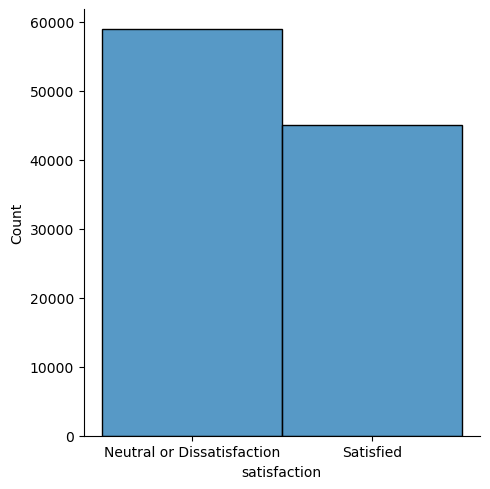

In [19]:
sns.displot( df4['satisfaction'] );
plt.show()

### 4.1.2 - Numerical Variable

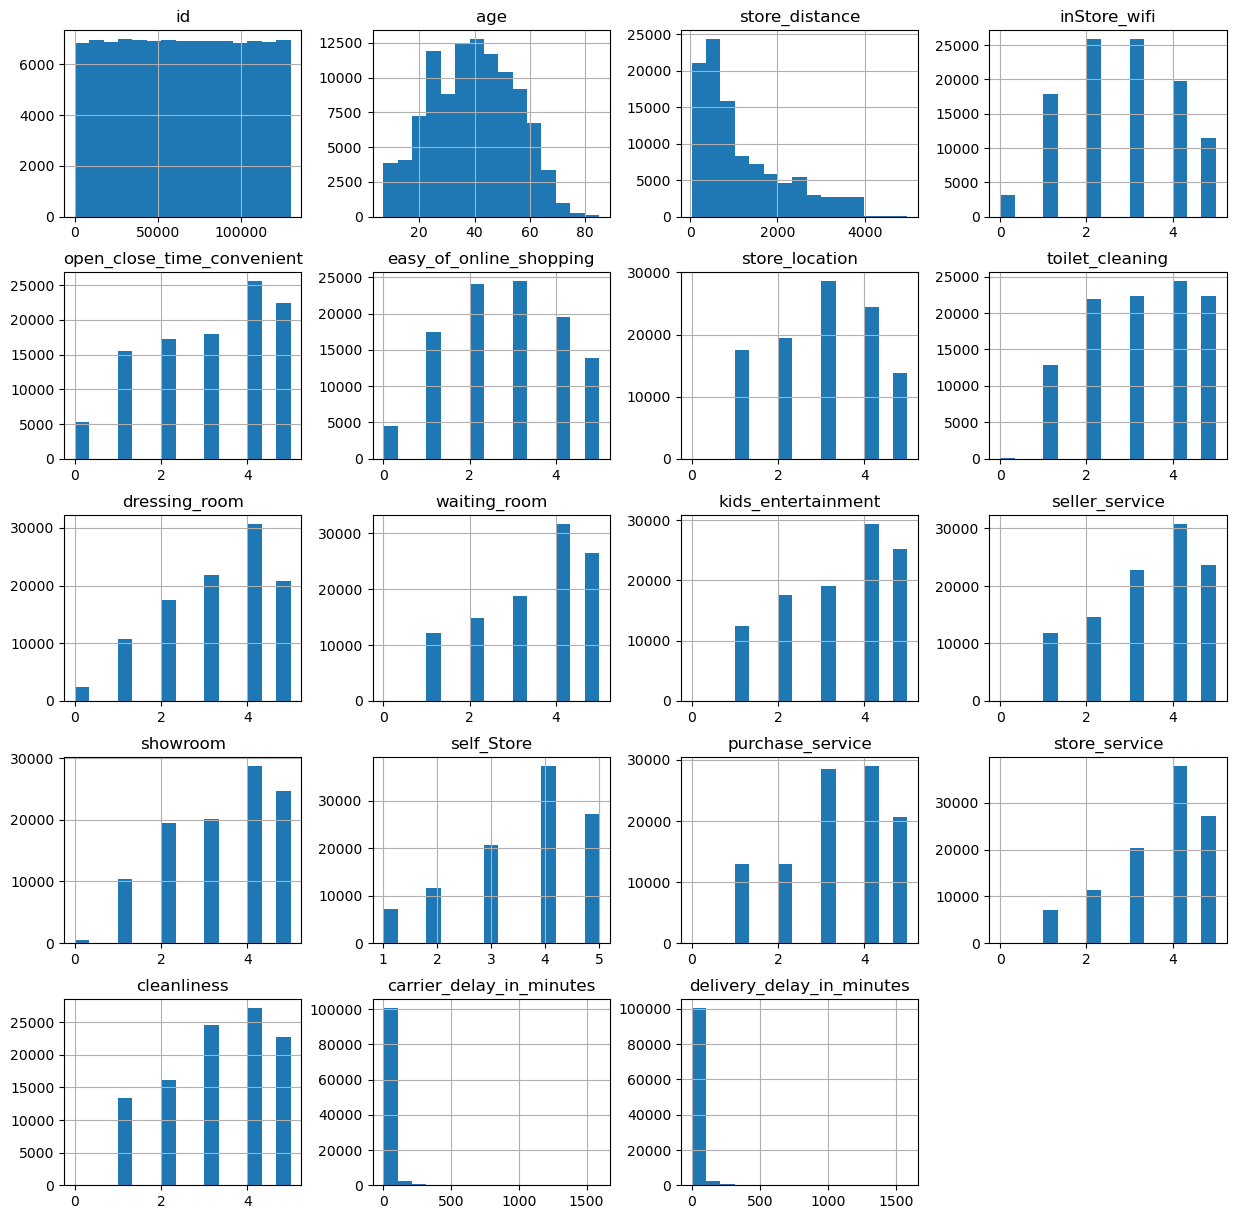

In [20]:
num_attributes.hist( bins = 15 , figsize = ( 15,15 ) );
plt.show()

### 4.1.3 - Categorical Variable

## 4.2. - Análise Bivariada

## 4.3. - Analise Multivariada

### 4.3.1 - Numerical Attributes

### 4.3.2 - Categorical Attributes

# 5.0. - PASSO 05 - DATA PREPARATION

In [21]:
df5 = df4.copy()

## 5.1. - Normalização

In [22]:
df2.columns

Index(['id', 'gender', 'customer_Type', 'age', 'type_of_purchase',
       'store_size', 'store_distance', 'inStore_wifi',
       'open_close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self_Store',
       'purchase_service', 'store_service', 'cleanliness',
       'carrier_delay_in_minutes', 'delivery_delay_in_minutes',
       'satisfaction'],
      dtype='object')

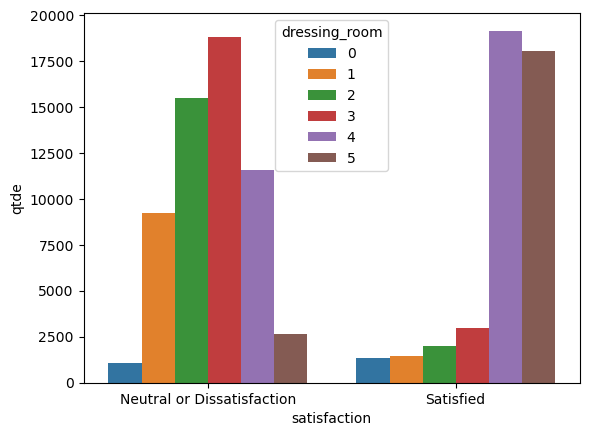

In [23]:
df = df2.groupby( ['dressing_room','satisfaction'] ).size().reset_index()
df.columns = ['dressing_room','satisfaction','qtde']
df['%'] = df['qtde'] / df['qtde'].sum()
sns.barplot( data = df , x = 'satisfaction', y = 'qtde', hue = 'dressing_room')
plt.show()

## 5.2. - Rescaling

In [24]:
df2.shape

(103904, 24)

## 5.3. - Transformação

### 5.3.1 - Encoding

In [25]:
# one hot encoding gender
df5 = pd.get_dummies(df5, columns=['gender'])

In [26]:
# one hot encoding customer_Type
df5 = pd.get_dummies(df5, columns=['customer_Type'])

In [27]:
# one hot encoding customer_Type
df5 = pd.get_dummies(df5, columns=['type_of_purchase'])

In [28]:
# label encoder
label_encoder = LabelEncoder()
df5['store_size'] = label_encoder.fit_transform(df5['store_size'])

In [29]:
# satisfaction - variavel resposta
df5['satisfaction'] = df5['satisfaction'].apply( lambda x: 1 if x =='Satisfied' else
                                                             0 if 'Neutral or Dissatisfaction' else x)

### 5.3.2 - Response Variable Transformation

### 5.3.2 Nature Transformation

# 6.0. - PASSO 06 - FEATURE SELECTION

In [30]:
df6 = df5.copy()

## 6.1. - Boruta as Feature Selector

## 6.2. - Manual Feature Selection

# 7.0. - PASSO 07 - MACHINE LEARNING MODELLING

In [31]:
df7 = df6.copy()

In [32]:
df7

,id,age,store_size,store_distance,inStore_wifi,open_close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,...,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction,gender_Female,gender_Male,customer_Type_Loyal Customer,customer_Type_disloyal Customer,type_of_purchase_Gift,type_of_purchase_Personal
0,70172,13,2,460,3,4,3,1,5,3,...,5,25,18,0,0,1,1,0,0,1
1,5047,25,0,235,3,2,3,3,1,3,...,1,1,6,0,0,1,0,1,1,0
2,110028,26,0,1142,2,2,2,2,5,5,...,5,0,0,1,1,0,1,0,1,0
3,24026,25,0,562,2,5,5,5,2,2,...,2,11,9,0,1,0,1,0,1,0
4,119299,61,0,214,3,3,3,3,4,5,...,3,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,1,192,2,1,2,3,2,2,...,2,3,0,0,1,0,0,1,1,0
103900,73097,49,0,2347,4,4,4,4,2,4,...,4,0,0,1,0,1,1,0,1,0
103901,68825,30,0,1995,1,1,1,3,4,1,...,4,7,14,0,0,1,0,1,1,0
103902,54173,22,1,1000,1,1,1,5,1,1,...,1,0,0,0,1,0,0,1,1,0


## 7.0 - Separa Treino em Teste

In [33]:
# separar dados de treino e teste
X = df7.drop( 'satisfaction', axis = 1 ) # treino
y = df7['satisfaction'] # teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 7.1 - Treino Logistic Regression

In [34]:
# instancia modelo
lr = LogisticRegression()

# treino modelo
lr.fit( X_train , y_train )

# previsao
y_pred = lr.predict( X_test )


C:\Users\oscar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# acuracia
acuracia = accuracy_score( y_test , y_pred)
acuracia

0.721043260670805

In [36]:
# cm
cm = confusion_matrix(y_test, y_pred )
cm

array([[8256, 3457],
       [2340, 6728]], dtype=int64)

In [37]:
lista = y_test.tolist()
lista = [1 for elemento in lista if elemento == 1]
len(lista)

9068

In [38]:
y.value_counts( normalize = True )

0    0.566667
1    0.433333
Name: satisfaction, dtype: float64

## 7.2 - Decision Tree

In [39]:
# instancia modelo
dt = DecisionTreeClassifier()

# treina o modelo
dt.fit(X_train, y_train)

# previsao
y_pred = dt.predict( X_test )

In [40]:
# acuracia
acuracia = accuracy_score( y_test, y_pred)
acuracia

0.9472595159039507

In [41]:
# cm
cm = confusion_matrix(y_test, y_pred )
cm

array([[11160,   553],
       [  543,  8525]], dtype=int64)

## 7.3 - Random Forest


In [42]:
# instancia modelo
rf = RandomForestClassifier()

# treina o modelo
rf.fit(X_train, y_train)

# previsao
y_pred = rf.predict( X_test )

In [43]:
# acuracia
acuracia = accuracy_score( y_test, y_pred)
acuracia

0.9654973292911795

In [44]:
# cm
cm = confusion_matrix(y_test, y_pred )
cm

array([[11507,   206],
       [  511,  8557]], dtype=int64)

# 8.0. - PASSO 08 - HYPERPARAMETER FINE TUNING

# 9.0. - PASSO 09 - TRADUÇÃO E INTERPRETAÇÃO DO ERRO

In [45]:
# função pra avaliar o modelo
def evaluate_models(models, X_test, y_test):
    # Criação do DataFrame vazio
    df = pd.DataFrame(columns=['Modelo', 'Precision', 'Recall', 'F1-score'])

    # Loop sobre os modelos
    for model in models:
        # Previsões
        y_pred = model.predict(X_test)

        # Cálculo das métricas
        precision = precision_score(y_test, y_pred,pos_label = 1)
        recall = recall_score(y_test, y_pred)
        acuracia = accuracy_score( y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Adição dos resultados ao DataFrame
        df = df.append({'Modelo': model, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'acuracia' : acuracia },
                       ignore_index=True)

    return df

In [46]:
# avaliando os modelos
modelos = [lr , dt , rf]
evaluate_models( modelos , X_test ,  y_test)

C:\Users\oscar\AppData\Local\Temp\ipykernel_9816\3469814399.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Modelo': model, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'acuracia' : acuracia },
C:\Users\oscar\AppData\Local\Temp\ipykernel_9816\3469814399.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Modelo': model, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'acuracia' : acuracia },
C:\Users\oscar\AppData\Local\Temp\ipykernel_9816\3469814399.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Modelo': model, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'acuracia' : acuracia },


,Modelo,Precision,Recall,F1-score,acuracia
0,LogisticRegression(),0.660579,0.741950,0.698904,0.721043
1,DecisionTreeClassifier(),0.939083,0.940119,0.939601,0.947260
2,"(DecisionTreeClassifier(max_features='auto', r...",0.976492,0.943648,0.959789,0.965497


# 10.0 - Submission

In [47]:
df_test.shape

(25976, 23)

In [48]:
def tratar_df_test( df ):
    
    cols_old = ['id', 'Gender', 'Customer Type', 'Age', 'Type of Purchase',
               'Store size', 'Store distance', 'InStore wifi',
               'Open/Close time convenient', 'Easy of online shopping',
               'Store location', 'Toilet cleaning', 'Dressing room', 'Waiting room',
               'Kids entertainment', 'Seller service', 'Showroom ', 'Self-Store',
               'Purchase service', 'Store Service', 'Cleanliness',
               'Carrier delay in minutes', 'Delivery delay in minutes']
    # coloco as colunas no estilo snake_case
    snake_case = lambda x : inflection.underscore(x) # defino a lambda function

    # aplico o map para cada nome cols_old e crio a lista cols_new
    cols_new = list( map( snake_case, cols_old ) )

    # renomeio as coluanas do dataset
    df.columns = cols_new

    #Normatizando o nome das colunas
    df.columns = [ 'id','gender','customer_Type','age','type_of_purchase','store_size',
                    'store_distance','inStore_wifi', 'open_close_time_convenient',
                    'easy_of_online_shopping','store_location','toilet_cleaning',
                    'dressing_room','waiting_room','kids_entertainment','seller_service',
                    'showroom','self_Store', 'purchase_service','store_service',
                    'cleanliness','carrier_delay_in_minutes','delivery_delay_in_minutes',
                    ]

    # preencho os na em carrier_delay_in_minutes
    valor_medio = int( df['delivery_delay_in_minutes'].mean() )
    df['delivery_delay_in_minutes'] = df['delivery_delay_in_minutes'].fillna( valor_medio )
     
    # mudo o tipo em delivery_delay_in_minutes
    #df['delivery_delay_in_minutes'] = df['delivery_delay_in_minutes'].astype( int ) 
    df['delivery_delay_in_minutes'] = df['delivery_delay_in_minutes'].astype( 'Int64' )
     
        # one hot encoding gender
    df = pd.get_dummies(df, columns=['gender'])

    # one hot encoding customer_Type
    df = pd.get_dummies(df, columns=['customer_Type'])

    # one hot encoding customer_Type
    df = pd.get_dummies(df, columns=['type_of_purchase'])

    # label encoder
    label_encoder = LabelEncoder()
    df['store_size'] = label_encoder.fit_transform(df['store_size'])

    
    return df


In [49]:
# trato os dados de teste do kaggle
df_submission = tratar_df_test( df_test )

# predict
y_pred_sb = rf.predict( df_submission )

df_submission['Satisfaction'] = y_pred_sb

In [50]:
df_submission[['id','Satisfaction']].to_csv( 'submission_v1.csv', index = False )